# Let's prepare the data

## Prepare y

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('seaborn-whitegrid')

In [96]:
df = pd.read_csv('dataset/gt.csv')
n_range = [0,2,2.4,3,math.inf]
k_range = [0,0.75,0.90,1.2,math.inf]

In [97]:
print("min:",min(df["N"]))
print("max:",max(df["N"]))
print("mean:",np.mean(df["N"]))
print("std:",np.std(df["N"]))

print()

k2, p = stats.normaltest(df['N'])
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


min: 1.376
max: 3.612
mean: 2.2588644444444443
std: 0.3200196547127522

p = 0.113729
The null hypothesis cannot be rejected


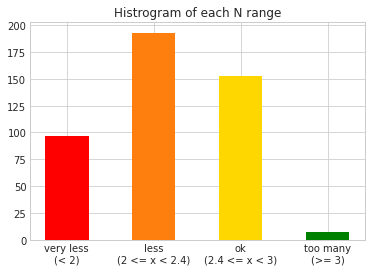

In [102]:
counts, bins = np.histogram(df['N'], bins=n_range)
# print(counts,bins)
plt.bar(np.arange(len(counts)), counts, tick_label=['very less\n(< 2)','less\n(2 <= x < 2.4)','ok\n(2.4 <= x < 3)','too many\n(>= 3)']  ,width=0.5,color=['r','tab:orange','gold','g'])
plt.title('Histrogram of each N range')
plt.show()